In [1]:
from sklearn.datasets import fetch_openml
mnist  = fetch_openml('mnist_784',version=1,parser='auto')

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y = mnist.data,mnist.target

In [4]:
X


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X
X.shape


(70000, 784)

In [6]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

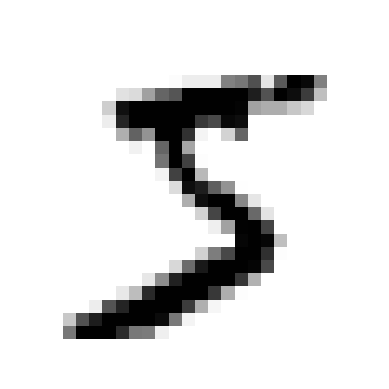

In [7]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.values.reshape(28, 28)
    plt.imshow(image,cmap="binary")
    plt.axis("off")


some_digit = X.iloc[0]
plot_digit(some_digit)
plt.savefig("some_digit_plot")
plt.show()

In [8]:
y[0]

'5'

# splitting the data into test and train

In [9]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

# Training a Binary Classifier

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Performance Measure 

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [14]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y = None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)



In [15]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train,cv = 5,scoring= "accuracy")

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/utils/_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "/var/folders/bx/p84kl_zj12114r6n7d44fh540000gn/T/ipy

array([nan, nan, nan, nan, nan])

In [16]:
# confusion matrix

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5 , cv =3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [19]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [20]:
from sklearn.metrics import precision_score,recall_score 

print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.8370879772350012
0.6511713705958311


In [21]:
from sklearn.metrics import f1_score 
f1_score(y_train_5,y_train_pred)

0.7325171197343846